In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
name = 'OrionLH'

In [4]:
reg = 'OrionLH'

In [5]:
pickle_in = open('SFresults//' + name + '.pkl',"rb")
SFresults = pickle.load(pickle_in)

In [6]:
B = SFresults['b2']
r = SFresults['s']
s0 = SFresults['s0']   
m = SFresults['m'] 
sig2 = SFresults['sig2'] 
r0 = SFresults['r0'] 
noise = B.mean()*0.05

In [7]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.125
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 2.225

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r = r, r0 = r0, m = m, s0 = s0, noise = 1/10, sig2=sig2,
)

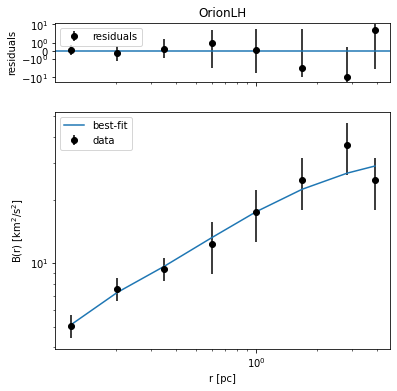

In [11]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title=reg,
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('Imgs//SF//' + reg + '.pdf', bbox_inches='tight')



In [12]:
CIresults = {'resultCI' : result2,
            'Rmax/r0' : r.max()/result2.params['r0'].value,
            'lT' : (r[3]/2**0.5)*((result2.params['r0'].value/r[3])**(result2.params['m'].value/2))
          }

In [13]:
f = open('CIresults//' + name +'.pkl',"wb")
pickle.dump(CIresults,f)
f.close()

In [14]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 310
    # data points      = 8
    # variables        = 5
    chi-square         = 1.64516329
    reduced chi-square = 0.54838776
    Akaike info crit   = -2.65281517
    Bayesian info crit = -2.25560746
[[Variables]]
    r0:     1.27451075 +/- 1.16029456 (91.04%) (init = 0.4376493)
    sig2:   15.5651554 +/- 16.2141627 (104.17%) (init = 10.43385)
    m:      1.20615899 +/- 1.58071753 (131.05%) (init = 1.1)
    s0:     0.06480257 +/- 0.33671781 (519.61%) (init = 0.04557866)
    noise:  4.28376020 +/- 14.2810531 (333.38%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s0, noise)   =  0.998
    C(sig2, m)     = -0.970
    C(m, noise)    =  0.961
    C(m, s0)       =  0.949
    C(sig2, noise) = -0.899
    C(sig2, s0)    = -0.885
    C(r0, sig2)    =  0.439
    C(r0, m)       = -0.280


In [15]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [16]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.30320236382590005 < 1e-05 at iteration 3 and prob(r0=0.8921575271648308) = 0.39358435868817315 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.16485352259999322 < 1e-05 at iteration 105 and prob(r0=14.656873660565092) = 0.5583248689450004 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.24577213103340062 < 1e-05 at iteration 5 and prob(sig2=23.347733132312104) = 0.4114945845328736 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.031960531476117236 < 1e-05 at iteration 9 and prob(m=0.12061589898666009) = 0.9627234571938562 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.00165046

          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :      -inf      -inf      -inf   1.27451      +inf      +inf      +inf
 sig2 : -12.43045  -9.65000  -5.00207  15.56516      +inf      +inf      +inf
 m    :      -inf  -0.82845  -0.76185   1.20616  +0.61227      +inf      +inf
 s0   :      -inf      -inf      -inf   0.06480  +0.03191  +0.16382      +inf
 noise:      -inf      -inf      -inf   4.28376  +1.06917  +2.27227  +4.92857


In [17]:
plt.style.use([
    "seaborn-poster",
])

In [18]:
plot_limits = {
    "s0": [0.0, 0.1],
    "m": [.5, .5],
    "r0": [0.1, 1.0],
    "noise": [0.0, 0.5],
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [19]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 754.5169656276703 seconds ---
